# Simple example
This example serves thet purpose of testing whether all the libraries are corrected loaded and to see that we can run a simple example in Python 3

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.0)

from network import Protocol, BCPNNFast, NetworkManager
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity

## Simple example

In [2]:
# Patterns parameters
hypercolumns = 4
minicolumns = 10
n_patterns = 5

# Manager properties
dt = 0.001
T_recalling = 5.0
values_to_save = ['o', 's', 'z_pre', 'z_post', 'a', 'p_pre', 'p_post', 'p_co', 'z_co', 'w', 'p',]
    
# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

epochs 0
epochs 1
epochs 2


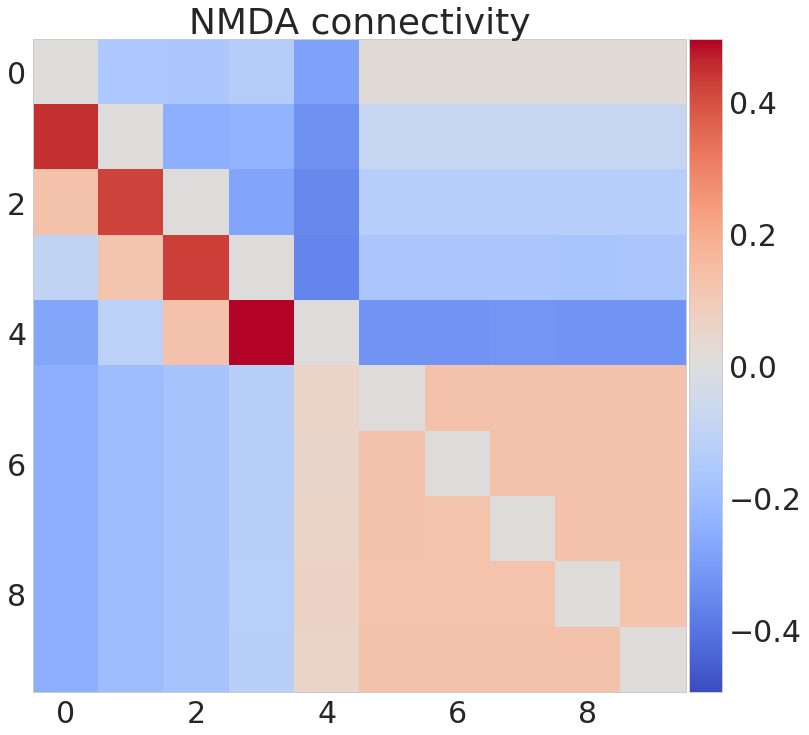

In [3]:
plot_weight_matrix(nn, ampa=False, one_hypercolum=True)

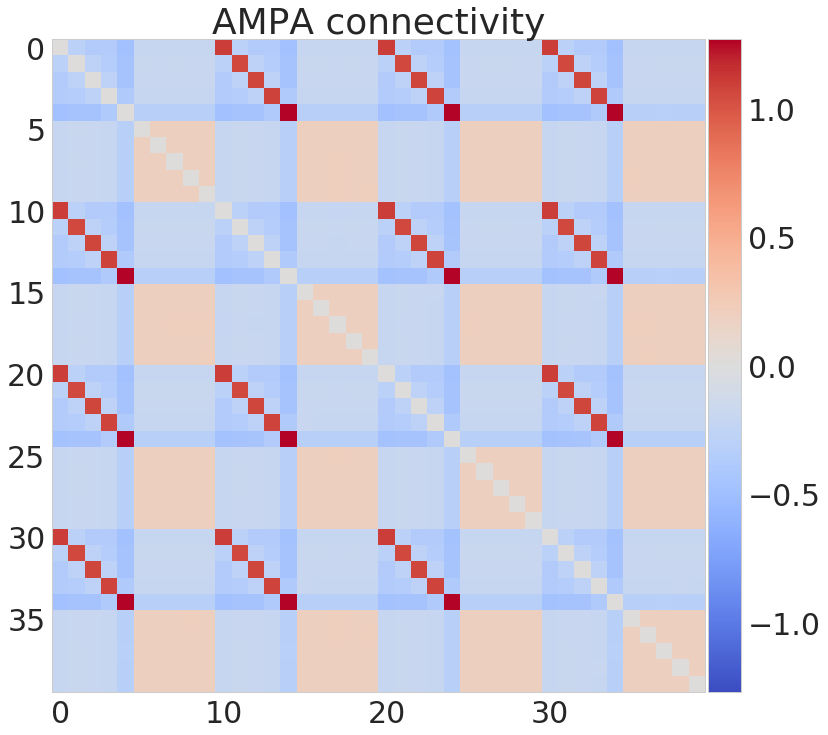

In [4]:
plot_weight_matrix(nn, ampa=True, one_hypercolum=False)

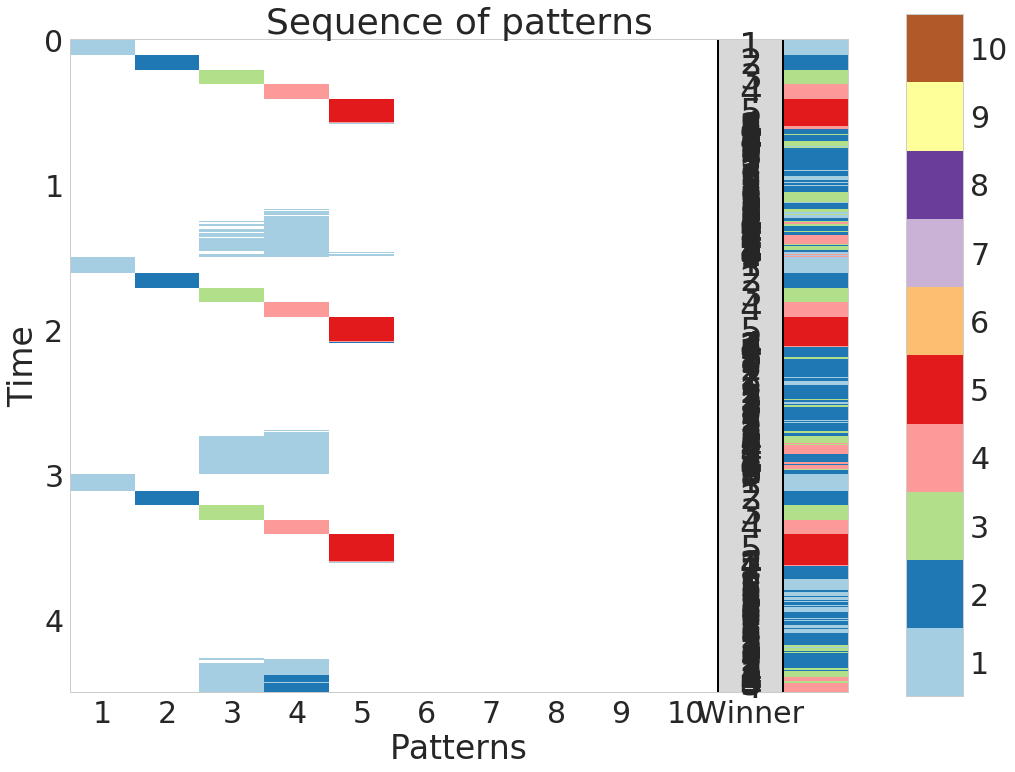

In [5]:
plot_winning_pattern(manager)

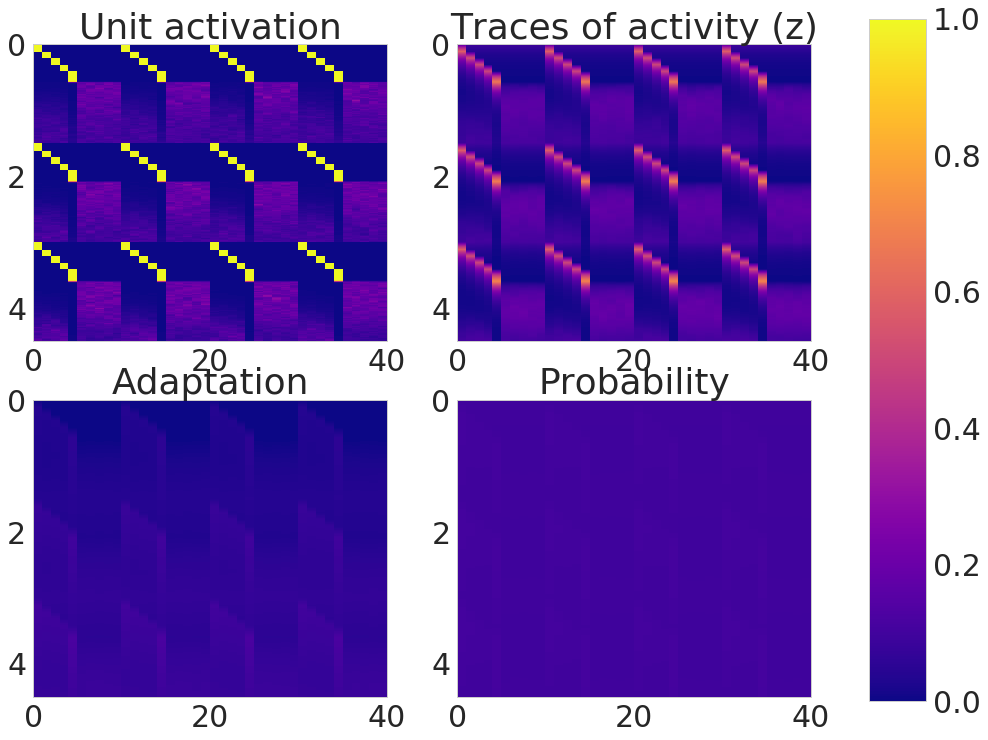

In [6]:
plot_network_activity(manager)

##### Dynamic evolution

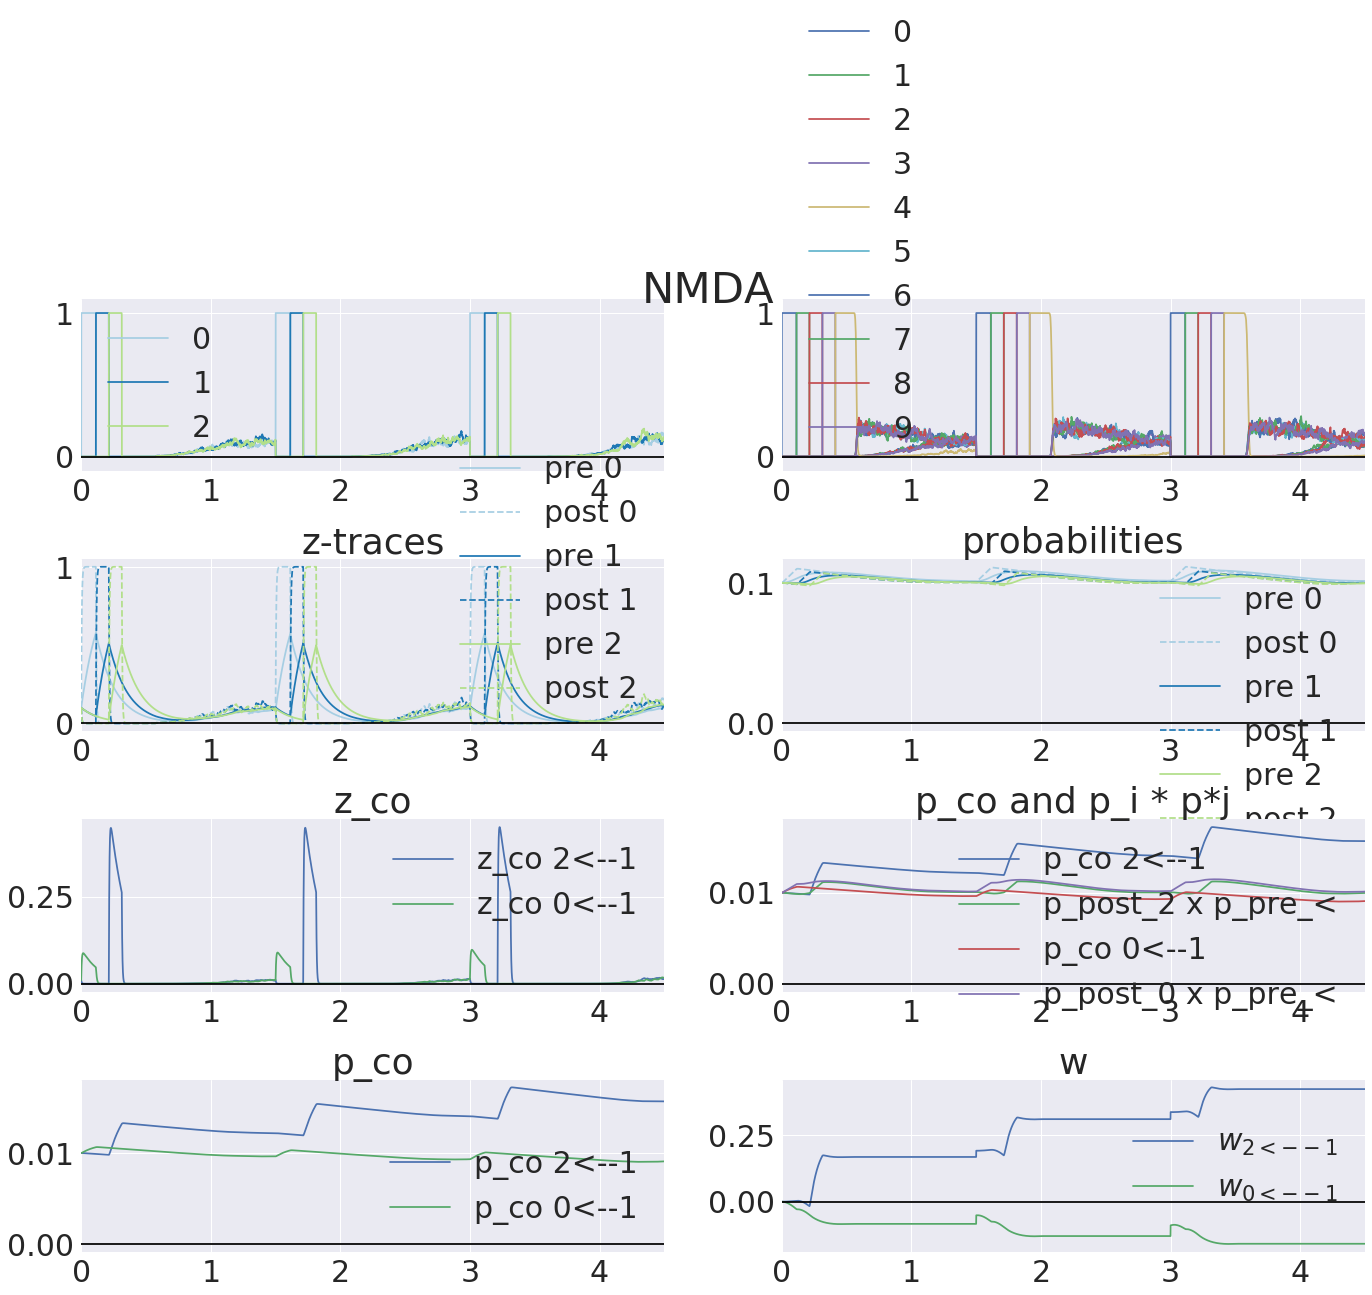

In [7]:
plot_state_variables_vs_time(manager, traces_to_plot=[0, 1, 2])

## Overlaps

In [8]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
dt = 0.001
values_to_save = ['o', 's', 'z_pre', 'z_post', 'a', 'p_pre', 'p_post', 'p_co', 'z_co', 'w', 'p',]

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)


# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
epochs = 3
number_of_sequences = 2
half_width = 3
units_to_overload = [0, 1]

# Build chain protocol
chain_protocol = Protocol()
sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)
chain_protocol.cross_protocol(chain=sequences, training_time=training_time,
                              inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=chain_protocol, verbose=True)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
epochs 0
epochs 1
epochs 2


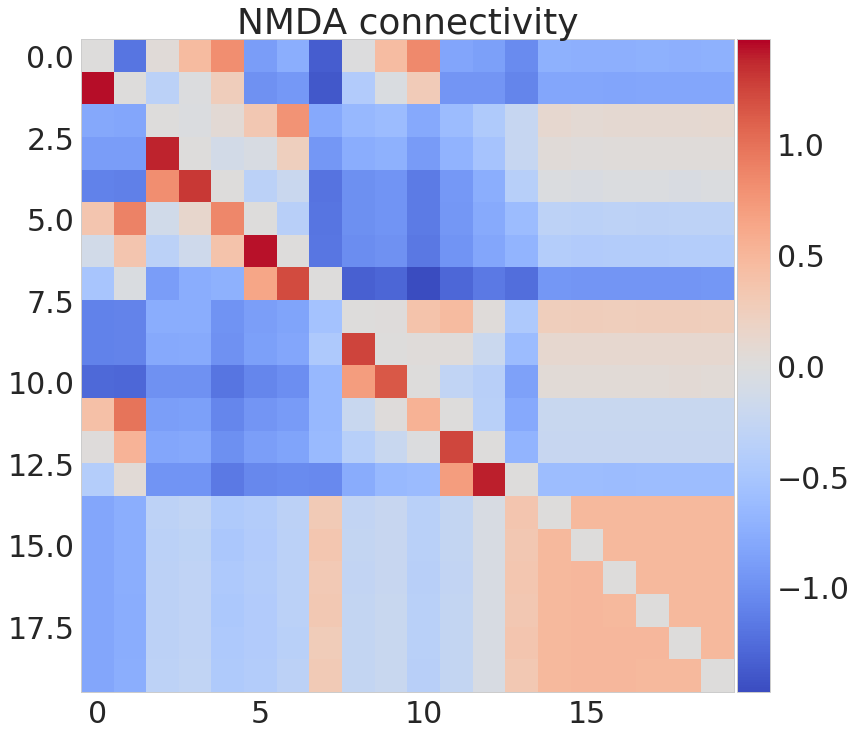

In [9]:
plot_weight_matrix(nn, ampa=False, one_hypercolum=True)